In [61]:
import pandas as pd
import numpy as np, warnings, itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt

warnings.simplefilter("ignore")

SARIMA

PROPHET

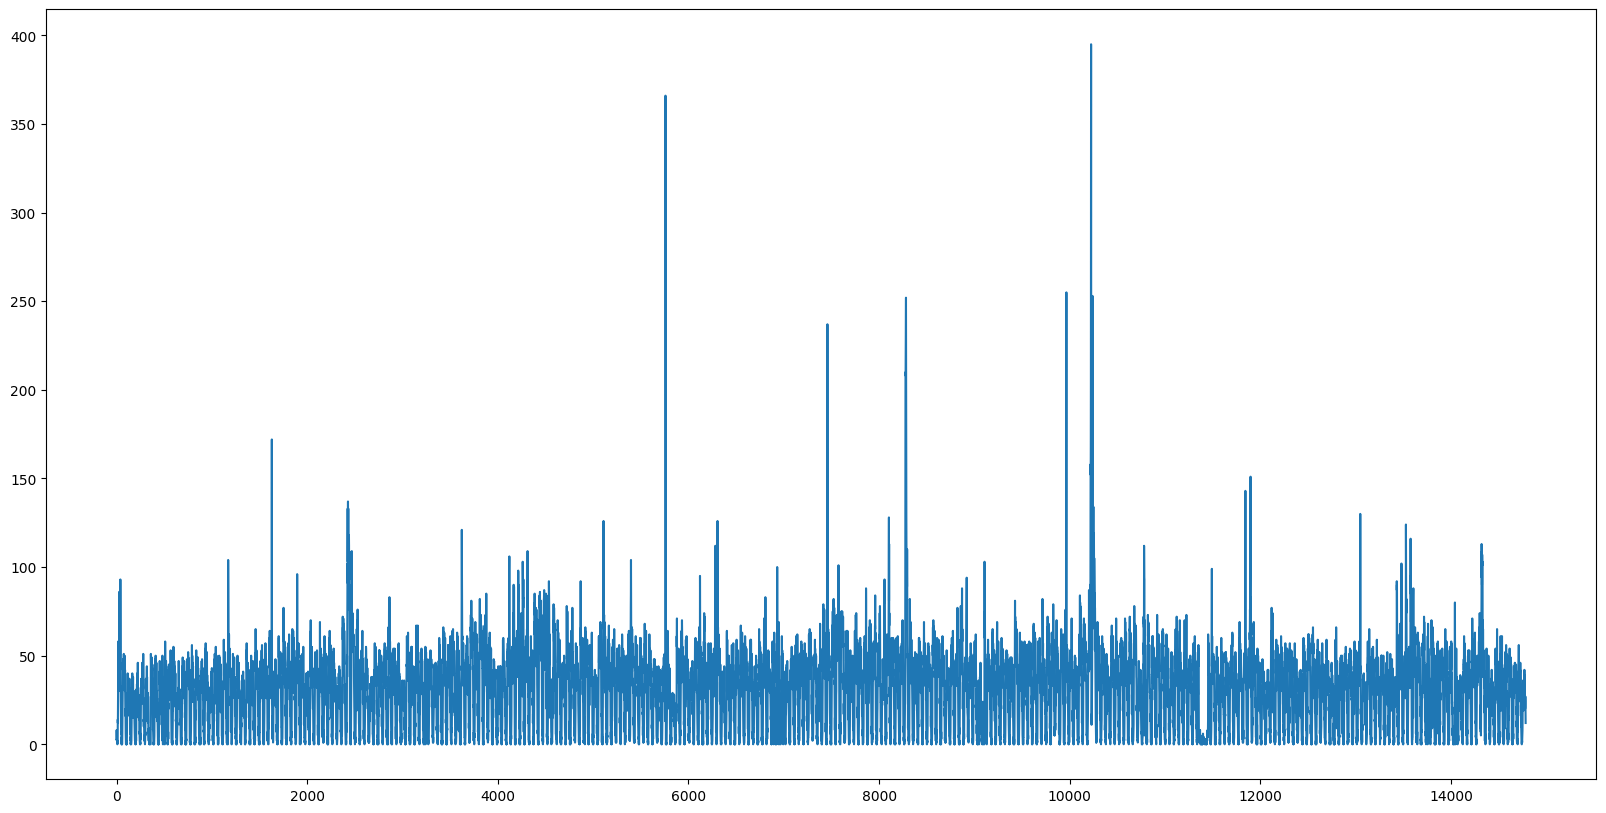

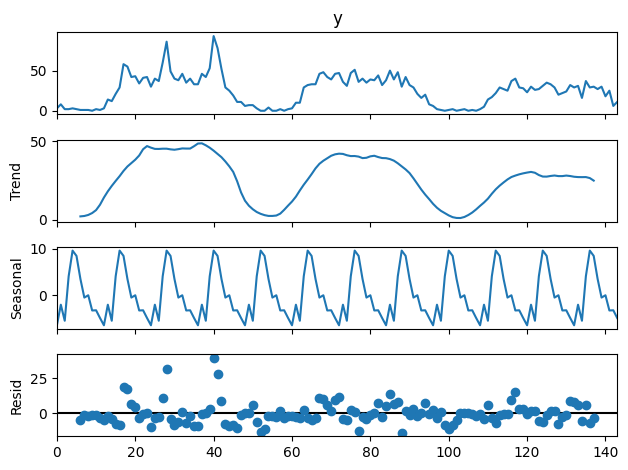

21:53:24 - cmdstanpy - INFO - Chain [1] start processing
21:53:35 - cmdstanpy - INFO - Chain [1] done processing


Time Required : 13.117729902267456 seconds


" future = m.make_future_dataframe(periods=1, freq='D')\nfcst = m.predict(future)\nfig, ax = plt.subplots(figsize=(15, 10))\nm.plot(fcst, ax=ax)\nax.plot(test_df, color='r', linestyle='--', label='Real Visit Data') "

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prophet as Prophet
from sklearn.metrics import mean_squared_error,r2_score
import math
import time
import statsmodels.api as sm
%matplotlib inline

df_data = pd.read_csv('priori.csv')
df = df_data[['date','nombre_appels']].copy()

#Comme vous pouvez le voir, le jeu de données contient 26396 lignes de données commençant à 2015-10-04 00:00:00 et se terminant à 2016-01-03 23:55:00 . A chaque jour, avec un intervalle de 5 minutes, le trafic est compté. Ainsi, pour chaque jour, nous obtenons 24x60/5 = 288 lignes ou horodatages de données de trafic.

plt.figure(figsize=(20,10))
plt.plot(df['nombre_appels'])
plt.show()



df
df = df.rename(columns = {'date':'ds','nombre_appels':'y'})
df.dtypes



#Affichage de la decomposition du signal sur les 144 premieres données
periode = 12
decomposition = sm.tsa.seasonal_decompose(df.y[:144], model='addictive', period = periode)
decomposition.plot()
plt.show()

df['ds'] = pd.to_datetime(df['ds'])
df.dtypes
df


train_df = df.iloc[:13296,:]
test_df = df.iloc[13296:,:]

train_df
test_df


start = time.time()

m = Prophet.Prophet()
m.fit(train_df)

end = time.time()
print('Time Required :', end-start,'seconds')
test = test_df.iloc[:,0:1]
fcst = m.predict(test)
fcst

""" future = m.make_future_dataframe(periods=1, freq='D')
fcst = m.predict(future)
fig, ax = plt.subplots(figsize=(15, 10))
m.plot(fcst, ax=ax)
ax.plot(test_df, color='r', linestyle='--', label='Real Visit Data') """




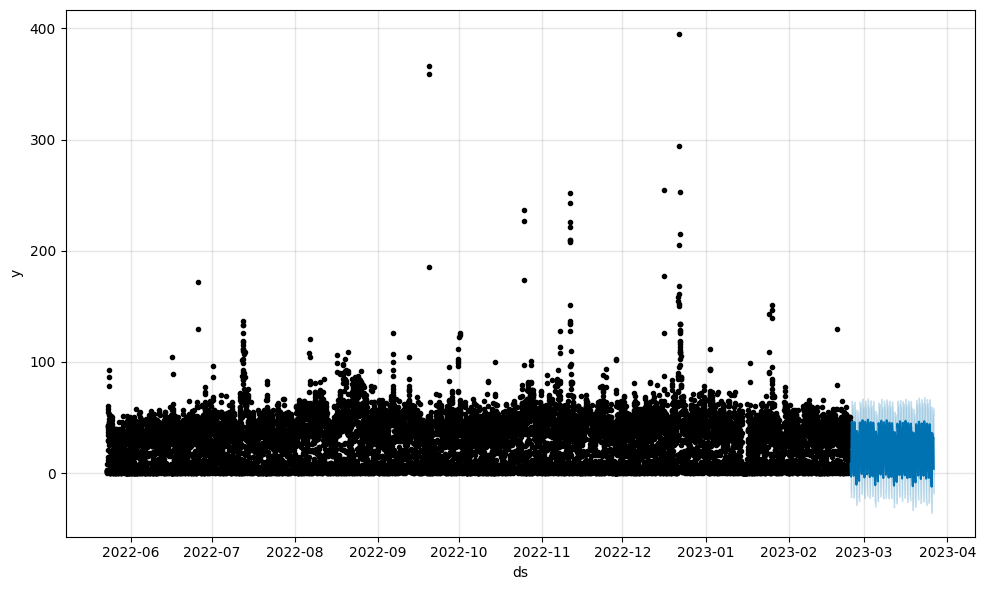

In [63]:
fig = m.plot(fcst)


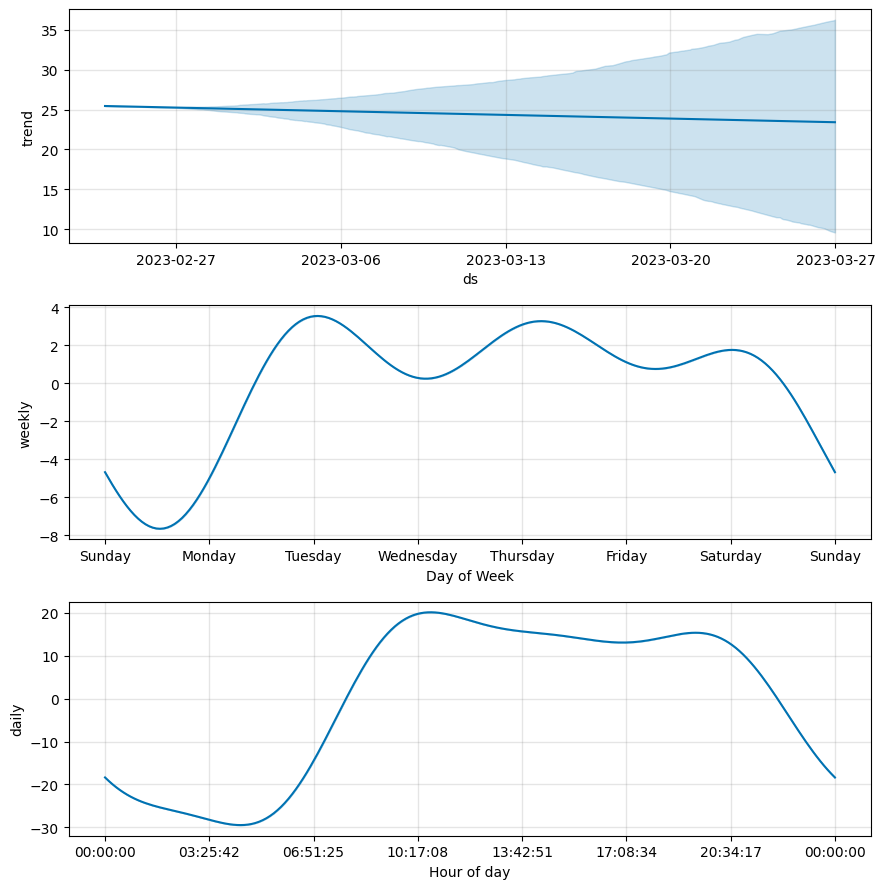

In [64]:
fig2 = m.plot_components(fcst)

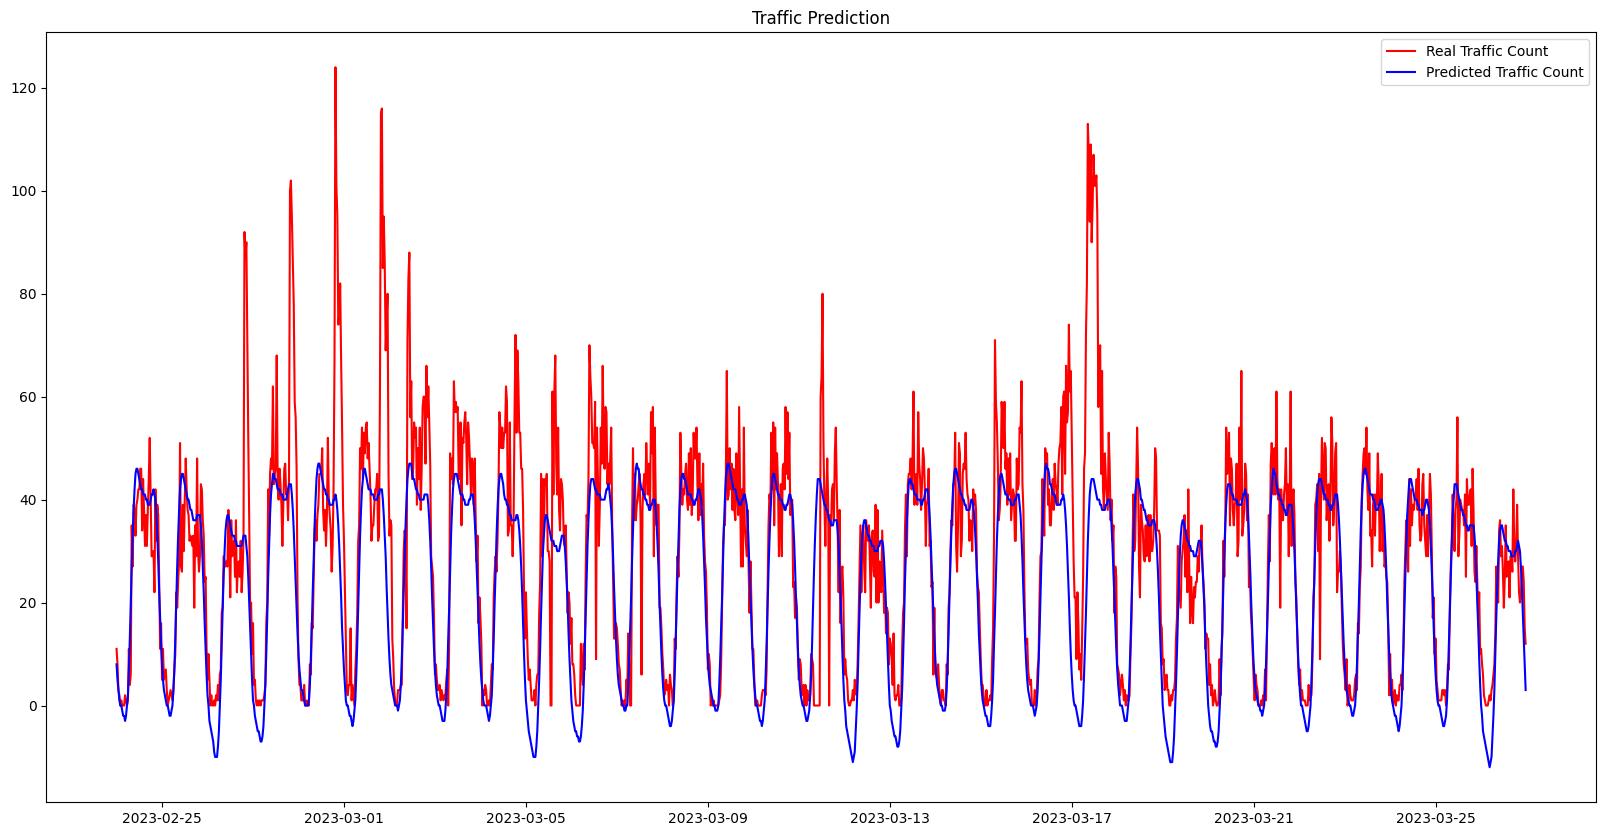

In [65]:
plt.figure(figsize=(20,10))
plt.plot(test_df['ds'],test_df['y'], color = 'red', label = 'Real Traffic Count')
plt.plot(fcst['ds'],fcst['yhat'].astype(int), color = 'blue', label = 'Predicted Traffic Count')
plt.title('Traffic Prediction')
plt.legend()
plt.show()

In [66]:
output = test_df.copy()
output['y_pred'] = fcst['yhat'].values.astype(int)
output

,ds,y,y_pred
13296,2023-02-24 00:00:00,11.0,8
13297,2023-02-24 00:30:00,8.0,5
13298,2023-02-24 01:00:00,3.0,3
13299,2023-02-24 01:30:00,2.0,1
13300,2023-02-24 02:00:00,0.0,0
...,...,...,...
14779,2023-03-26 21:30:00,27.0,23
14780,2023-03-26 22:00:00,27.0,18
14781,2023-03-26 22:30:00,24.0,13
14782,2023-03-26 23:00:00,15.0,8


In [73]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error



rmse = math.sqrt(mean_squared_error(test_df['y'],fcst['yhat'].astype(int)))
mse = mean_squared_error(test_df['y'], fcst['yhat'].astype(int))
print("RMSE :",rmse)
print("MSE :",mse)
r_sq = r2_score(test_df['y'],fcst['yhat'].astype(int))
print("RSquared:",r_sq)
""" print('Time Required :', end-start,'seconds')
 """
""" df_merge = pd.merge(test_df, fcst['yhat'].astype(int))
df_merge = df_merge[['yhat','y']]
df_merge.head() """

y_true = test_df['y'].values
y_pred = fcst['yhat'].astype(int).values
mae_01 = mean_absolute_error(y_true, y_pred)
mape_01 = mean_absolute_percentage_error(y_true, y_pred)


""" print(type(test_df['y']))
print(type(fcst['yhat']))
a = test_df['y'].values-fcst['yhat']
print(a) """


minus=test_df['y'].values.astype(int)-fcst['yhat'].values.astype(int)

print(minus)
print(test_df['y'].values.astype(int))


mape = mean_absolute_percentage_error(test_df['y'], fcst['yhat'])
print("mape", mape)




rmse2 = np.sqrt(mean_squared_error(test_df['y'],fcst['yhat'].astype(int))).round(2)



print(sorted(fcst['yhat']))


""" mse = mean_squared_error(test_df['y'], pred) """


""" from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon='3 days')
df_p = performance_metrics(test_df)
df_p.head() """




RMSE : 13.72211248196654
MSE : 188.29637096774192
RSquared: 0.5885572248969222
[ 3  3  0 ... 11  7  9]
[11  8  3 ... 24 15 12]
mape 2183406508581528.5
[-12.318802622600305, -11.865273729797572, -11.859334421284295, -11.85677347392129, -11.405805528337421, -11.399866219814207, -11.39730527245992, -10.946337327033362, -10.940398018329969, -10.937837070974311, -10.892158087017098, -10.486869125573207, -10.480929817028112, -10.478368869654467, -10.43268988553837, -10.129530679268694, -10.027400924099297, -10.018900668168868, -9.973221684074492, -9.774247463558059, -9.6700624778131, -9.513753482595764, -9.314779262118542, -9.210594276370802, -9.054285281131872, -8.855311060652628, -8.75112607491521, -8.702311598314346, -8.517435043649446, -8.459758948292045, -8.39584285920182, -8.29165787347291, -8.242843396863812, -8.057966842169971, -8.000290746796129, -7.936374657796378, -7.904277662704175, -7.783375195428604, -7.684226541287693, -7.665250467818147, -7.598498640699116, -7.540822545427066

" from prophet.diagnostics import performance_metrics\nfrom prophet.diagnostics import cross_validation\ndf_cv = cross_validation(m, horizon='3 days')\ndf_p = performance_metrics(test_df)\ndf_p.head() "